In [38]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [39]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [40]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

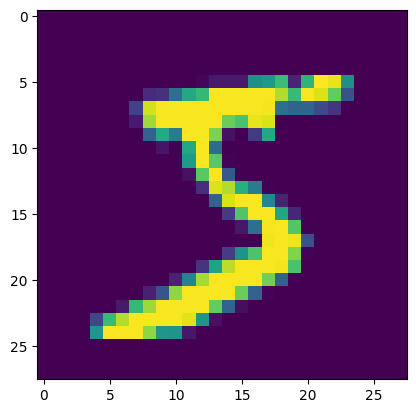

In [41]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])


In [42]:
# to make all values between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [43]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [46]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8617 - loss: 0.4841 - val_accuracy: 0.9588 - val_loss: 0.1379
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9631 - loss: 0.1244 - val_accuracy: 0.9647 - val_loss: 0.1177
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9757 - loss: 0.0798 - val_accuracy: 0.9717 - val_loss: 0.0969
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9816 - loss: 0.0594 - val_accuracy: 0.9713 - val_loss: 0.0988
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9860 - loss: 0.0440 - val_accuracy: 0.9751 - val_loss: 0.0888
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9901 - loss: 0.0319 - val_accuracy: 0.9713 - val_loss: 0.1017
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9923 - loss: 0.0252 - val_accuracy: 0.9678 - val_loss: 0.1255
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9923 - loss: 0.0226 

In [47]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [48]:
y_pred = y_prob.argmax(axis=1)

In [49]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.976

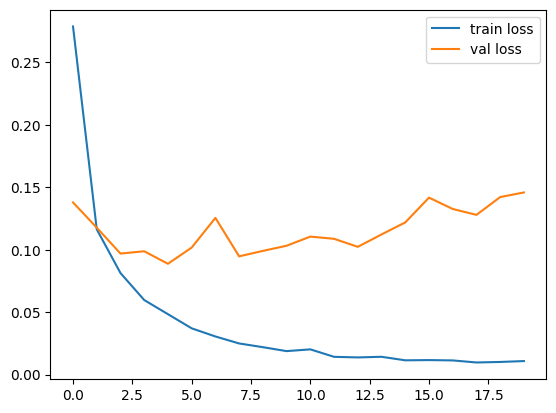

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

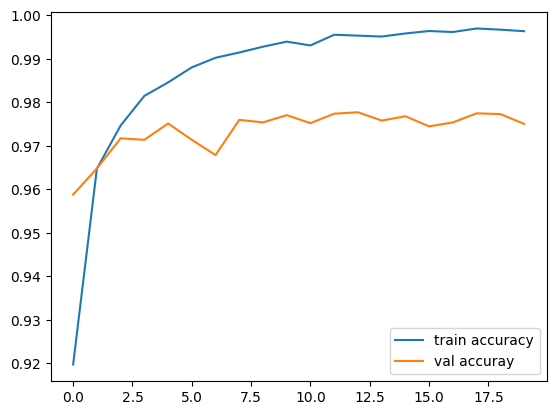

In [52]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuray')
plt.legend()
plt.show()

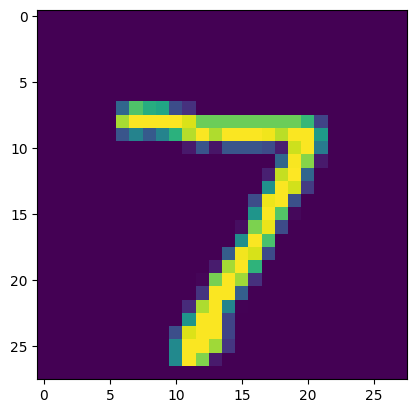

In [54]:
# single image prediction
plt.imshow(x_test[0])

In [55]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([7])